# Confidence Intervals

## Sampling Distributions

In [26]:
import pandas as pd
import random
from scipy import stats

def fake_population(size, dist):
    '''Create a fake population from a given distribution
    
    See also https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html
    '''
    dists = ['dweibull', 'fatiguelife', 'gompertz', 'laplace', 'norm', 'rayleigh', 'uniform']

    if dist == 'random':
        return fake_population(size, dist=random.choice(dists))

    match dist:
        case 'dweibull':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_dweibull.html
            # https://en.wikipedia.org/wiki/Weibull_distribution
            return stats.dweibull.rvs(c=2.07, size=size)
        case 'fatiguelife':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_fatiguelife.html
            # https://en.wikipedia.org/wiki/Birnbaum%E2%80%93Saunders_distribution
            return stats.fatiguelife.rvs(c=29, size=size)
        case 'gompertz':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_gompertz.html
            # https://en.wikipedia.org/wiki/Gompertz_distribution
            return stats.gompertz.rvs(c=0.947, size=size)
        case 'laplace':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_laplace.html
            # https://en.wikipedia.org/wiki/Laplace_distribution
            return stats.laplace.rvs(size=size)
        case 'nakagami':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_nakagami.html
            # https://en.wikipedia.org/wiki/Nakagami_distribution
            return stats.nakagami.rvs(nu=4.97, size=size)
        case 'norm':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_norm.html
            # https://en.wikipedia.org/wiki/Normal_distribution
            return stats.norm.rvs(size=size)
        case 'rayleigh':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_rayleigh.html
            # https://en.wikipedia.org/wiki/Rayleigh_distribution
            return stats.rayleigh.rvs(size=size)
        case 'uniform':
            # https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_uniform.html
            # https://en.wikipedia.org/wiki/Continuous_uniform_distribution
            return stats.uniform.rvs(size=size)
        case _:
            raise Exception(f'No such distribution: {dist}')


In [27]:
# Set parameters of experiment
pop_size = 1000000 # population size
spl_size = 100 # sample size
n = 100 # number of samples


**Exercise:** Create a fake population

In this step we create fake data for a hypothetical population.
Keep in mind that under normal conditions we almost never have access to the data from the whole population.

In [28]:

# Generate a fake population from an unknown distribution
pop = pd.Series(fake_population(size=pop_size, dist='random'))
pop.head()

0    0.345192
1    0.962939
2    0.032356
3    0.076050
4    0.203334
dtype: float64

<Axes: >

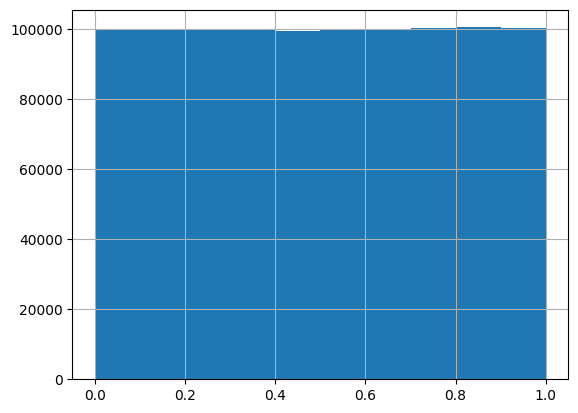

In [29]:
pop.hist()

In [30]:
pop.mean(), pop.std()

(0.5005408894106427, 0.2888111019319832)

**Exercise:** Draw a sample from the population

In this step we are massively simplifying a process which under normal conditions is much more involved,
e.g. taking a survey or performing a lab or field experiment.
This allows us to repeat this step in order to observe an effect,
which under normal conditions we take as a given.

Repeat this exercise and observe, how the results change.

In [31]:
df = pop.sample(spl_size)
df

551908    0.535306
333304    0.353432
481237    0.941847
804366    0.962145
254390    0.318507
            ...   
674691    0.334092
585699    0.755133
258564    0.727238
180305    0.501322
191202    0.797397
Length: 100, dtype: float64

In [32]:
df.mean(), df.std()

(0.5161124943268914, 0.30637418865157245)

**Exercise:** Draw multiple samples from the population

In this step we programmatically repeat the previous step,
collect the results in a `DataFrame` and calculate the mean for each sample.

The distribution of the sample means is called a [sampling distribution](https://en.wikipedia.org/wiki/Sampling_distribution).

In [33]:
# Create DataFrame for the samples, each row contains one sample
spl = pd.DataFrame(columns=[i for i in range(0, spl_size)])

# Draw n samples of same size and add to DataFrame
for i in range(0, n):
    spl.loc[i] = pop.sample(spl_size).to_list()

# Calculate the mean for each sample
spl['mean'] = spl.mean(axis=1)

# Compare population mean and mean of sampling distribution
pop.mean(), spl['mean'].mean()

(0.5005408894106427, 0.502811840269009)

<Axes: >

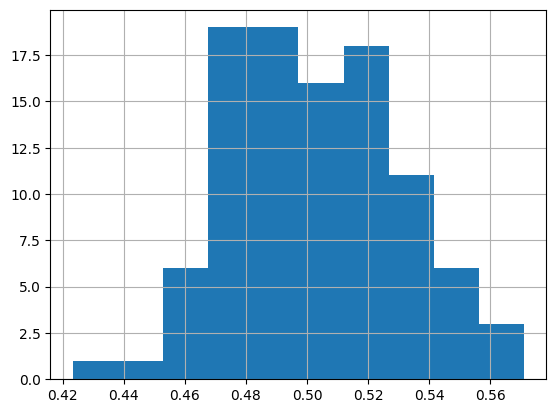

In [34]:
spl['mean'].hist()